In [42]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [43]:
# !pip install openpyxl

In [44]:
data = pd.read_excel('E:/Assignments_C/Real estate valuation data set.xlsx')

In [45]:
data.pop('No')
data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [47]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [48]:
data.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [49]:
data.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
# !pip install plotly
import plotly.express as px

In [51]:
fig = px.histogram(data,x = "X2 house age",y = "X4 number of convenience stores",width=500,color= "Y house price of unit area"
)
fig.show()

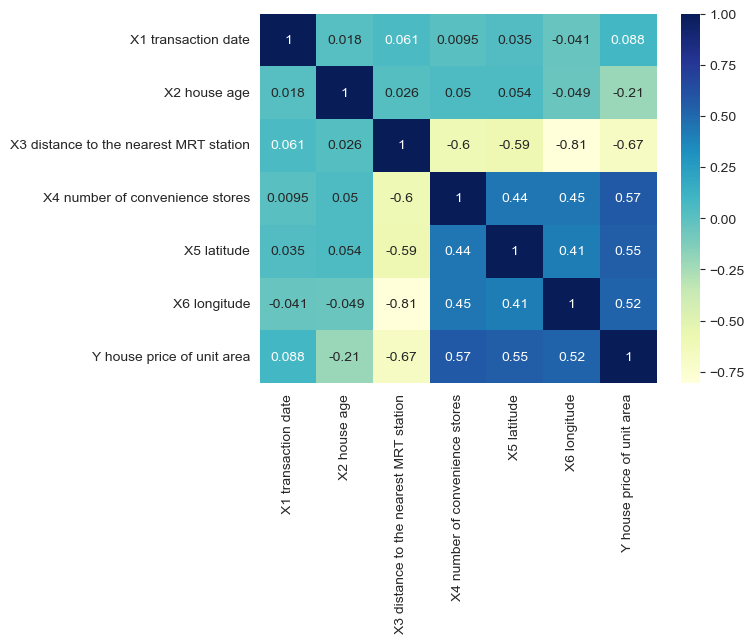

In [52]:
# plt.figure()
sns.heatmap(data.corr(),annot = True,cmap = "YlGnBu");

In [53]:
# x1,x2,X3 is not giving a good relation
data.pop('X1 transaction date')
data.pop('X2 house age')
data.pop('X3 distance to the nearest MRT station')

0        84.87882
1       306.59470
2       561.98450
3       561.98450
4       390.56840
          ...    
409    4082.01500
410      90.45606
411     390.96960
412     104.81010
413      90.45606
Name: X3 distance to the nearest MRT station, Length: 414, dtype: float64

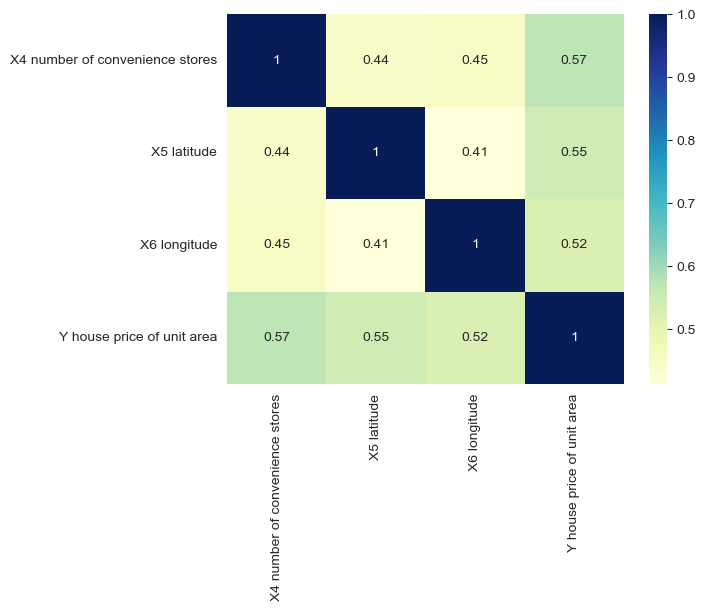

In [54]:
sns.heatmap(data.corr(),annot = True,cmap = "YlGnBu");

In [55]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = data.columns[1:-1], data.columns[-1]
inputs_df, targets = data[input_cols].copy(), data[target_col].copy()


In [56]:
inputs_df

,X5 latitude,X6 longitude
0,24.98298,121.54024
1,24.98034,121.53951
2,24.98746,121.54391
3,24.98746,121.54391
4,24.97937,121.54245
...,...,...
409,24.94155,121.50381
410,24.97433,121.54310
411,24.97923,121.53986
412,24.96674,121.54067


In [23]:
targets

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [26]:
# Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df)
inputs_df = imputer.transform(inputs_df)
scaler = MinMaxScaler().fit(inputs_df)
inputs_df = scaler.transform(inputs_df)

In [27]:
inputs_df

array([[0.73059361, 0.00951267, 1.        , 0.61694135, 0.71932284],
       [0.44520548, 0.04380939, 0.9       , 0.5849491 , 0.71145137],
       [0.30365297, 0.08331505, 0.5       , 0.67123122, 0.75889584],
       ...,
       [0.42922374, 0.05686115, 0.7       , 0.57149782, 0.71522536],
       [0.18493151, 0.0125958 , 0.5       , 0.42014057, 0.72395946],
       [0.14840183, 0.0103754 , 0.9       , 0.51211827, 0.75016174]])

In [28]:
# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.25, random_state=42)